In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

In [3]:
font = {'size'   : 20, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'

 False
1.75952705386 1.55576348959
False
0.049556374885 0.0438174556926
False
-0.118074430152 -0.104400717841
False
-0.0875192955436 -0.0773840472316
False
-0.0496136366298 -0.0438680861911
False
-0.0244919454205 -0.0216556343312
False
-0.0104233642208 -0.00921627744106
False
-0.00329914618774 -0.00291708568756
False
-5.58863747813e-05 -4.9414404433e-05


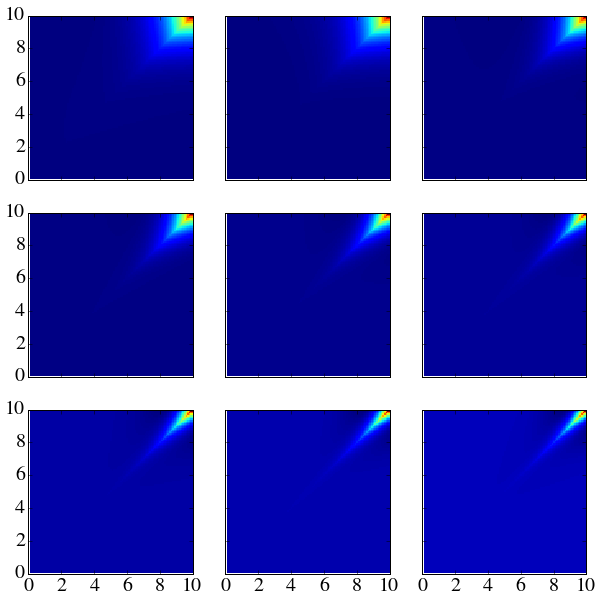

In [15]:
q = np.linspace(0.1,10,100)
#q = np.array([0.01+i*0.07 for i in range(201)])
#print q

lmax = 10
cosmo = Class()
Z = cosmo.compute_Zl_massive(q,lmax)

f, axes = plt.subplots(3,3,sharex=True,sharey=True,figsize=(10,10))
[Q, Qpr] = np.meshgrid(q,q)
l = 0
for i in range(3):
    for j in range(3):
        ax = axes[i][j]
        arr = Z[l].T*np.exp(Q)
        ax.pcolormesh(q,q,Z[l].T*np.exp(Q))
        print np.allclose(arr.T, arr)
        print arr[2,4],arr[4,2]
        l = l+1

In [18]:
import scipy
import scipy.linalg as la
def inu_dist(q):
    return np.exp(-q)

def weights(q):
    f0 = inu_dist(q)
    dq = q[1]-q[0]
    w = f0*dq
    w[0] = w[0]*0.5
    w[-1] = w[-1]*0.5
    return w
    
Nq = 100
q = np.linspace(0.1,12,Nq)
lmax = 10
cosmo = Class()
Z = cosmo.compute_Zl_massive(q,lmax)

C3term = -40./3*np.diag(q)
f0invmat = np.diag(1./inu_dist(q))
wmat = np.diag(weights(q))

for l in range(lmax+1):
    Zterm = np.dot(f0invmat,np.dot(Z[l],wmat))

    fullmat = C3term+Zterm
    L = la.eig(fullmat,right=False)
    print 'Eigenvalues, l='+str(l)+':',L[np.real(L)>0]
    print 'Imaginarity, l='+str(l)+':',np.imag(L)/np.real(L)



Eigenvalues, l=0: [ 0.03708413+0.j]
Imaginarity, l=0: [-0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]
Eigenvalues, l=1: []
Imaginarity, l=1: [-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]
Eigenvalues, l=2: []
Imaginarity, l=2: [-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -

In [45]:
for l in range(1):
    Zterm = np.dot(f0invmat,np.dot(Z[l],wmat))

    fullmat = C3term+Zterm
    L = la.eig(fullmat,right=False)
    print 'Eigenvalues, l='+str(l)+':',L[:30]

Eigenvalues, l=0: [ -1.59945070e+02+0.j  -1.59569319e+02+0.j  -1.59231024e+02+0.j
  -1.58898054e+02+0.j  -1.58567673e+02+0.j  -1.58238900e+02+0.j
  -1.57911249e+02+0.j  -1.57584440e+02+0.j  -1.57258290e+02+0.j
  -1.56932676e+02+0.j  -1.56607508e+02+0.j  -1.56282719e+02+0.j
  -1.55958258e+02+0.j  -1.55634083e+02+0.j  -1.55310161e+02+0.j
  -1.54986466e+02+0.j  -1.54662974e+02+0.j  -1.54339667e+02+0.j
  -1.54016528e+02+0.j  -1.53693544e+02+0.j  -1.53370702e+02+0.j
  -1.53047991e+02+0.j  -1.52725403e+02+0.j  -1.52080562e+02+0.j
  -1.52402929e+02+0.j   3.87305700e-04+0.j  -1.31605464e+00+0.j
  -1.44068039e+00+0.j  -1.62571160e+00+0.j  -1.93416816e+00+0.j]


In [23]:

D1 = np.diag(np.diagonal(np.random.rand(3,3)))
A2 = np.random.rand(3,3)
D2 = np.diag(np.diagonal(np.random.rand(3,3)))

print np.dot(D1,np.dot(A2,D2))
print np.dot(A2.T,np.dot(D1,D2))


[[ 0.01020533  0.11475939  0.16715954]
 [ 0.08372453  0.83044655  0.04696512]
 [ 0.08657975  0.53497669  0.22279731]]
[[ 0.01020533  0.66904326  0.27637142]
 [ 0.01436107  0.83044655  0.21370278]
 [ 0.0523666   0.11757097  0.22279731]]


In [18]:
A=np.random.rand(3,3)
np.diag(np.diagonal(A))

array([[ 0.85550211,  0.        ,  0.        ],
       [ 0.        ,  0.44563272,  0.        ],
       [ 0.        ,  0.        ,  0.58516463]])